# CareerFoundry Exercise 4.9 Pt 2 Intro to Data Visualization with Python

## 1. Import necessary libraries and data set

In [4]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
#Loading data set

path = r'C:\Users\rmr1q.000\Instacart Basket Analysis'
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers.pkl'))

In [6]:
ords_prods_cust.head()

,Unnamed: 0,Index,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,First Name,Last name,Gender,State,Age,date_joined,n_dependants,fam_status,income,_merge
0,0,0,2539329,1,1,2,8,NaN,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,2398795,1,2,3,7,15.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,2,473747,1,3,3,12,21.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,3,2254736,1,4,4,7,29.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,4,431534,1,5,4,15,28.0,196,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [7]:
ords_prods_cust.shape

(32404859, 34)

In [8]:
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0              int64   
 1   Index                   int64   
 2   order_id                int64   
 3   user_id                 int64   
 4   order_number            int64   
 5   order_day_of_week       int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   product_id              int64   
 9   add_to_cart_order       int64   
 10  reordered               int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  price_range_loc         object  
 16  busiest day             object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  spending_average        float64 
 21  spendi

## 2. Create a bar chart, histogram, scatterplot, and line chart

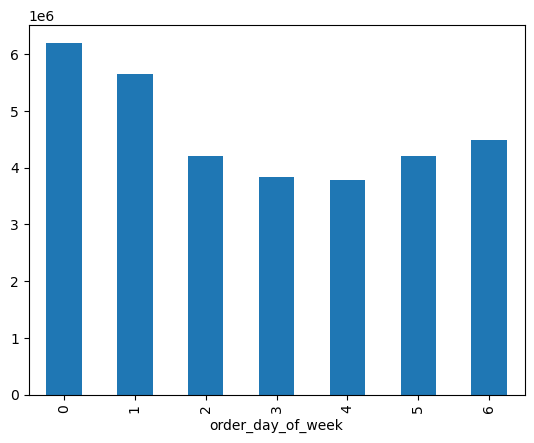

In [9]:
#Creating bar chart

order_bar = ords_prods_cust['order_day_of_week'].value_counts().sort_index().plot.bar();

In [10]:
#Getting rid of the price outliers for the histogram

ords_prods_cust.loc[ords_prods_cust['prices'] > 100, 'prices'] = np.nan

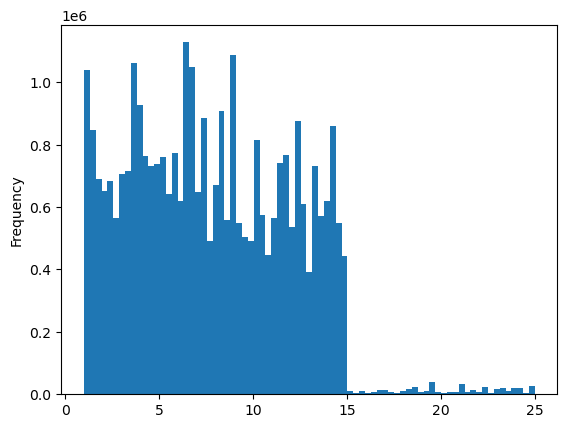

In [11]:
#Creating histogram

prices_hist = ords_prods_cust['prices'].plot.hist(bins=77)

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Age vs Income Scatterplot')

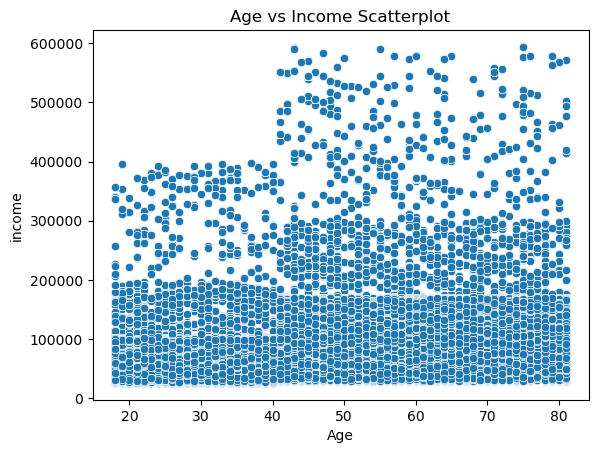

In [54]:
#Creating a scatterplot of age vs income

age_income_scatter = sns.scatterplot(x = 'Age', y = 'income', data = ords_prods_cust)
plt.title('Age vs Income Scatterplot')

In [39]:
#Grouping age and calculating average income

average_income_by_age = ords_prods_cust.groupby('Age')['income'].mean().reset_index()

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Text(0, 0.5, 'Average Income')

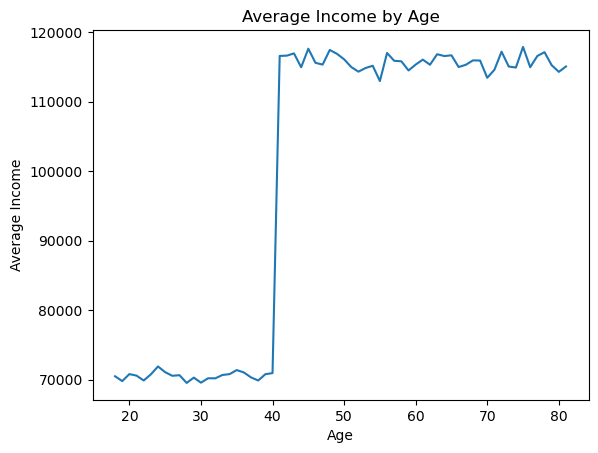

In [42]:
average_income_line = sns.lineplot(data=average_income_by_age, x='Age', y='income')
plt.title("Average Income by Age")
plt.xlabel("Age")
plt.ylabel("Average Income")

## Creating a 70/30 data split to create the line chart

In [13]:
np.random.seed(77)
test = np.random.rand(len(ords_prods_cust)) <= 0.7

In [14]:
len(test)

32404859

In [15]:
big = ords_prods_cust[test]
small = ords_prods_cust[~test]

In [16]:
#Checking the ratio of the big data set to the entire data set

len(big) / (len(big) + len(small))

0.7000014411418979

In [17]:
#Creating a subset of the smaller data set that contains only the columns that will be graphed

small_sub = small[['order_day_of_week', 'prices']]

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Text(0.5, 1.0, 'Average Spending Daily')

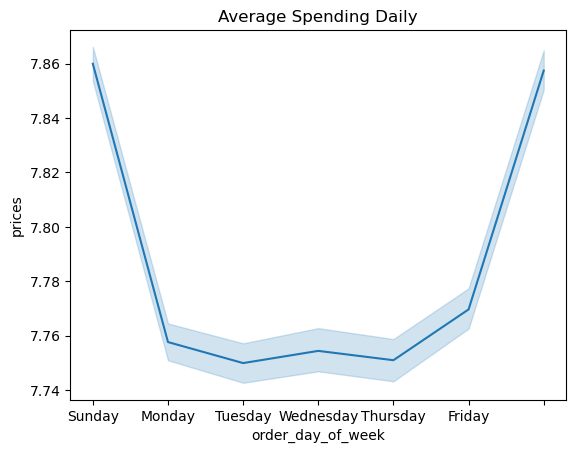

In [53]:
line = sns.lineplot(data = small_sub, x = 'order_day_of_week', y = 'prices')
ax=plt.gca()
ax.set_xticklabels(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title('Average Spending Daily')

## 3. Create a histogram of the 'order_hour_of_day' column

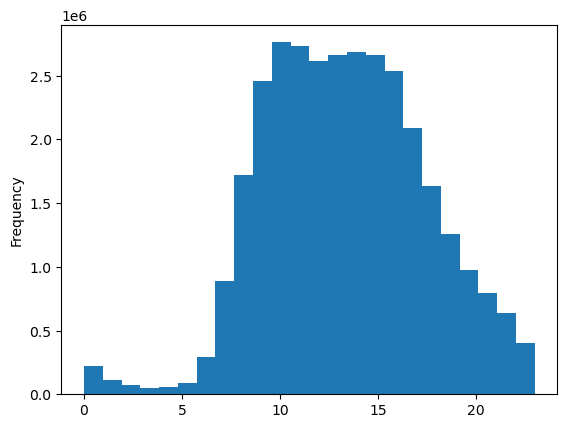

In [19]:
order_hour_hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins=24)

This histogram is plotting the frequency of orders for each hour of the day. The largest amount of orders are placed between 9am and 4pm.

## 4. Create a bar chart for the 'loyalty_flag' column

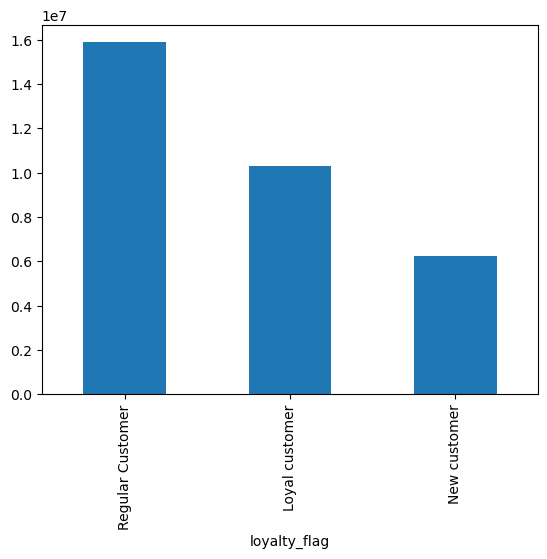

In [20]:
orders_by_loyalty_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()

## 5. Create a line chart of 'order_hour_of_day' vs 'prices'

In [21]:
small_sub1 = small[['order_hour_of_day', 'prices']]

In [48]:
small_sub1['prices'].value_counts()

prices
12.3    186830
10.3    152714
4.0     134373
6.3     131872
1.3     128131
         ...  
17.9        36
22.7        33
21.5        28
18.3         4
21.0         1
Name: count, Length: 240, dtype: int64

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

Text(0.5, 1.0, 'Average Spending Hourly')

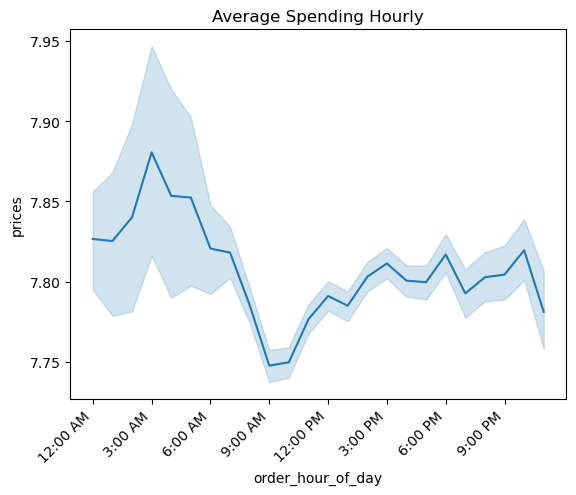

In [52]:
hour_prices_line = sns.lineplot(data = small_sub1, x = 'order_hour_of_day', y = 'prices')
ax=plt.gca()
ax.set_xticks([0, 3, 6, 9, 12, 15, 18, 21])
ax.set_xticklabels(['12:00 AM', '3:00 AM', '6:00 AM', '9:00 AM', '12:00 PM', '3:00 PM', '6:00 PM', '9:00 PM'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Average Spending Hourly')

## 6. Create a line chart exploring the connections between age and number of dependents

In [23]:
small_sub2 = small[['Age', 'n_dependants']]

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

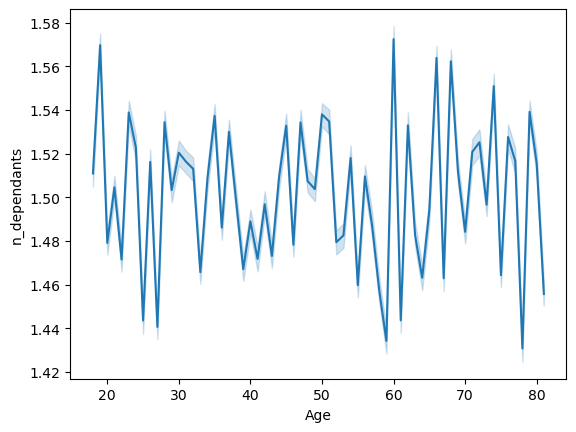

In [24]:
Age_vs_dependants_line = sns.lineplot(data = small_sub2, x = 'Age', y = 'n_dependants')

The chart shows how many dependents someone at a certain age in the data set will have. The line is very radical and does not show a clear pattern. We can take this to mean that this is a weak or no correlation between a person's age and how many dependents they have.

## 7. Create a scatterplot of age vs income

This scatter plot was already created in a previous step.

In [25]:
small_sub3 = small[['Age', 'income', 'loyalty_flag']]

C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rmr1q.000\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

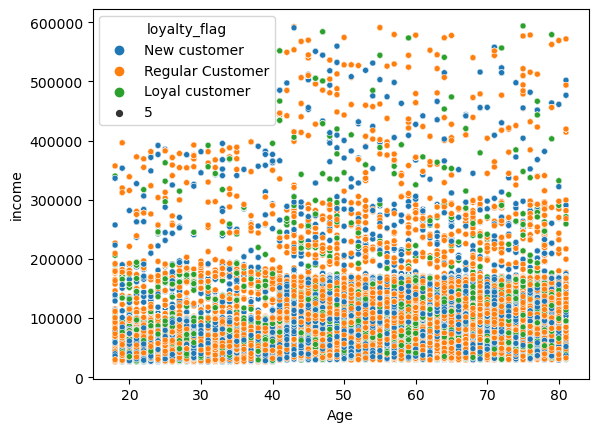

In [26]:
#Making a scatterplot of Age vs Income and using different colors for the different loyalty flags

age_vs_income_scatter = sns.scatterplot(x = 'Age', y = 'income', data = small_sub3, size = 5, hue = 'loyalty_flag')

## 8. Exporting visualizations as png's

In [27]:
age_vs_income_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age vs. Income Scatterplot.png'))

In [28]:
Age_vs_dependants_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Age vs. Dependants Linechart.png'))

In [56]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order Day vs Prices Linechart.png'))

In [55]:
hour_prices_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Order Hour vs Prices Linechart.png'))

In [31]:
orders_by_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders by Loyalty Barchart.png'))

In [32]:
order_hour_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders by Hour Histogram.png'))

In [33]:
prices_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Prices Histogram.png'))

In [34]:
order_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Orders by Day Barchart.png'))

In [50]:
average_income_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Average Income by Age Linegraph.png'))

In [57]:
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income vs Age Scatterplot.png'))